# ISAE FOTSU321 : Imagerie radar
# BE - 08/10/2025

## Nom prénom
Dacher Maël
Fournier Ella

<span style="color:blue"> Instructions générales : </span> 

 * Téléchargez les données ici : https://filesender.renater.fr/?s=download&token=1e1a7d16-dfbc-4a94-9815-52737c4e1ba5 (512 Mo) et placez-les dans le même répertoire que ce notebook.
 
 * Données dans des formats alternatifs (si le premier fichier ne marche pas) :
     * netcdf : https://filesender.renater.fr/?s=download&token=f32a8fe9-d4bc-4387-8430-f25cbf6f6ef6 (512 Mo)
     * txt : https://filesender.renater.fr/?s=download&token=e9bad22c-be8d-4bf6-80f4-14f7fd668740 (1,6 Go)

 * complétez votre nom et prénom dans la cellule ci-dessus
 
 
 * Faites attention aux variables "globales", qui sont définies pour tout le notebook ! Si vous en utilisez, donnez leur des noms spécifiques (e.g. si vous définissez H=658 dans l'exercice 2 puis H=900 dans l'exercice 3, la première définition est caduque. Attention donc à l'ordre de vos évaluations. Autant que possible, encapsulez vos variables dans des fonctions (variables locales). Je veux pouvoir executer votre notebook dans l'ordre depuis le début et reproduire vous outputs (ce que vous pouvez vérifier vous-mêmes en faisant Kernel "Restart & Clear Output" puis en réévaluant toutes les cellules dans l'ordre.
 
 
 * Toutes les antennes seront considérées pour simplifier comme "idéales" : leur gain dans les deux directions est considéré comme nul en dehors du cône dont l'ouverture est donné par le rapport de la longueur d'onde et de la taille de l'antenne et constant à l'intérieur de ce cône (même approximation que celle utilisée en cours)
 
 
 * On se placera pour simplifier dans l'approximation Terre plate et orbite rectiligne (comme dans le cours) : on néglige la rotondité de la Terre et la courbure de l'orbite. Ceci est valide pour l'intégralité du BE (sauf évidemment pour la question bonus de l'exercice 2). 
 
 
  * Dans tout ce BE, on utilisera les packages et les constantes ci-dessous. Veillez donc à évaluer la cellule ci-dessous ainsi que la suivante (qui modifie simplement l'aspect des plots).

In [48]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
import pylab
import xarray as xr

c = 299792458. # m/s

In [3]:
pylab.rc('font', family='serif', size=16)

## <span style="color:red"> Exercice 1 : cours</span>

<span style="color:blue">Question 1 :</span> énoncez deux raisons pour lesquelles il est intéressant de construire des radars imageurs dans des bandes de fréquences différentes (bande P, L, X, Ku, Ka...)

La fréquence permet de pénétrer le sol sur plus ou moins de profondeur. 
Certains phénomènes physiques réagissent plus, ou sont plus visibles dans certaines plages de fréquences (ex: mesurer l'humidité du sol, la salinité, )
Pour des faibles fréquences, on a une plus faible résolution au sol, mais une meilleure portée. Inversement pour les hautes fréquences.

<span style="color:blue">Question 2 :</span> un radar imageur vole à $v=7400$ m/s à une altitude de $H=900$ km. La longueur de l'antenne (dans le sens de l'orbite) est $L=5$ m et sa largeur est $W=1$ m. La fréquence centrale du signal émis est $f_c=35.75$ GHz (bande Ka) et la largeur de bande du chirp vaut $B_{\rm chirp}=200$ MHz. La durée d'émission du chirp est $\tau = 15 \mu s$. L'écho retour est échantilloné à la fréquence $f_s=300$ MHz et la fréquence d'émission des pulses est $PRF=4420$ Hz. L'axe de l'antenne est dans le plan perpendiculaire à la trajectoire et forme un angle $\theta=3°$ avec la verticale. Toutes les notations/conventions sont les mêmes que dans le cours.

 <span style="color:blue">2a :</span> quelle est la résolution en range et en azimuth d'un tel instrument ?

In [14]:
v = 7400
H = 900e3
L = 5 #m
W = 1
f_c = 35.75e9
B_chirp = 200e6 #Hz
tau = 15e-6
f_s = 300e6
PRF = 4420
theta = 3 #deg
c = 3e8 #m.s-1


r_range = 0.5 * c / B_chirp
r_az = L/2

<span style="color:blue">2b :</span> le signal est-il bien échantilloné au sens de Shannon (dans les deux dimensions...) ?  Justifiez votre réponse.

In [16]:
# Shannon condition in azimuth
B_dop = 2*v/L
print("Shannon condition en azimuth:", PRF >= B_dop)

# Shannon condition in range
print("Shannon condition en range:", f_s >= B_chirp)

Shannon condition en azimuth: True
Shannon condition en range: True


<span style="color:blue">2c : </span>Quel intérêt y a-t-il à augmenter la PRF ? Donnez par ailleurs deux raisons pour lesquelles on ne peut pas augmenter cette PRF indéfiniment.

Augmenter la PRF permet de réduire les ambiguïtés de range. Cependant, la PRF est bornée par la relation: 
PRF < (c*W*cos(theta)) / (2*lambda*R0*sin(theta))

<span style="color:blue">Question 3 : </span>expliquez en une ou deux phrases le phénomène de layover qui affecte les images radar

Pulse qui coincide avec l'écho nadir.

## <span style="color:red"> Exercice 2</span>

Cet exercice traite des ambiguités en range que nous avons discutées à l'occasion du cours 3 et de la façon dont on choisit la fauchée et la PRF pour les supprimer. On rappelle qu'on se place pour simplifier dans l'approximation Terre plate et orbite rectiligne. On considèrera un radar imageur volant à une altitude constante $H=658$ km.

<span style="color:blue">Question 1 : </span>Rappelez en une phrase ce que sont les ambiguités range.

Il y a une ambiguïté range lorsque les échos de deux points se superposent. C'est-à-dire que leur distance range est égale à 0.5c/PRF.?????

Ou alors c'est ??????

<span style="color:blue">Question 2a : </span> On considère (uniquement pour cette question 2, a et b) un radar imageur de $PRF = 1500$ Hz et une cible située à un angle $\theta=30°$. Calculez le rang d'ambiguité $k$ de l'écho retour.

In [21]:
H = 658e3
PRF = 1500
theta = np.deg2rad(30)
k=(2*H/np.cos(theta)/c) * PRF
print(f"Rang: {k}")

Rang: 7.597929542535474


<span style="color:blue">Question 2b : </span> Calculez également le rang d'ambiguité $k'$ de l'écho nadir. Expliquez pourquoi on s'intéresse à l'écho nadir alors que l'antenne pointe à $30°$.

In [22]:
k_prime=(2*H/c) * PRF
print(f"k' :{k_prime}")


k' :6.579999999999999


On souhaite à présent construire le diagramme "en diamant" que nous avons vu en cours. Le résultat (que vous devez donc reproduire) est ci-dessous. Je vous en rappelle le principe : on représente dans le plan $(PRF,\theta)$ les bandes interdites. En bleu, celles pour lesquelles l'écho retour d'une cible située à l'angle $\theta$ arrive pendant l'émission d'un pulse ultérieur. En vert, celles pour lesquelles l'écho retour d'une cible située à l'angle $\theta$ arrive pendant un écho nadir. Notons $t=0$ le temps d'émission du début du premier pulse du radar et $\tau$ la durée de l'impulsion. On utilisera pour les applications numériques $\tau = 30 \mu s$.

![title](diamond_plot.png)

<span style="color:blue">Question 3a : </span> Considérons une cible vue avec un angle $\theta$ et intéressons nous à l'instant d'arrivée de l'écho retour du premier pulse. Pour une valeur de PRF donnée, quelles conditions doit satisfaire le temps d'aller-retour $t_{AR}(\theta)$ pour que l'écho retour se superpose à la fenêtre d'émission du pulse $q$ (c'est-à-dire pour être dans la q-ème bande interdite bleue) ? En écrivant $t_{AR}(\theta)$ en fonction de $H$, $\theta$ et $c$, en déduire une borne supérieure et une borne inférieure sur $\theta$ pour appartenir à la q-ème bande interdite bleue.

Pour q un entier, le temps d'aller retour pour un theta donné doit vérifier:

q/PRF <= t_AR(theta) <= q/PRF + tau
On remplace t_AR(theta):
q/PRF <= 2*H/(c*cos(theta)) <= q/PRF + tau

Pour theta dans [0, pi/2]:

arccos(2*H*PRF/(q*c)) <= theta <= arccos(2*H*PRF/(c*(q+tau*PRF)))


<span style="color:blue">Question 3b : </span> Pour une valeur de PRF donnée, quelles conditions doit satisfaire le temps d'aller-retour $t_{AR}(\theta)$ pour que l'écho retour se superpose à la réception de l'écho nadir du pulse $q'$ (c'est-à-dire pour être dans la $q'$-ème bande interdite verte) ? En déduire une borne supérieure et une borne inférieure sur $\theta$ pour appartenir à la $q'$-ème bande interdite verte.

Temps d'aller retour nadir: 2*H/c

Superposition echo nadir: t_ar(theta) dans [q' * 2*H/c, q' * 2*H/c + tau]

t_ar(theta) = 2*H/(c*cos(theta))

q' * 2*H/c <= t_ar(theta) <= q' * 2*H/c + tau

arccos(1/q') <= theta <= arccos(1/(q' + tau*c/(2*H)))



<span style="color:blue">Question 4 : </span> Reproduire à présent le plot en diamant. Vous pourrez notamment vous servir de la fonction matplotlib fill_between qui, comme son nom l'indique, remplit la zone entre deux courbes. Vous pourrez vous appuyer sur l'ébauche de code ci-dessous (qui colorie une zone qui n'a évidemment rien à voir!). En particulier, la grille en PRF est déjà définie pour vous.

In [33]:
q = 8
def theta_max_PRF(PRF):
    return np.arccos(2*H*PRF/(c*(q*tau*PRF)))
print(2*H*PRF/(c*(q+tau*PRF)))
print(H,c,tau)
theta_max_PRF(1500)

0.8201932066064193
658000.0 300000000.0 1.5e-05


/tmp/ipykernel_17287/1962392222.py:3: RuntimeWarning: invalid value encountered in arccos
  return np.arccos(2*H*PRF/(c*(q*tau*PRF)))


np.float64(nan)

/tmp/ipykernel_17287/891212860.py:12: RuntimeWarning: invalid value encountered in arccos
  return np.rad2deg(np.arccos(2*H*PRF/((q-tau*PRF)*c)))
/tmp/ipykernel_17287/891212860.py:9: RuntimeWarning: invalid value encountered in arccos
  return np.rad2deg(np.arccos(2*H*PRF/(c*(q+tau*PRF))))


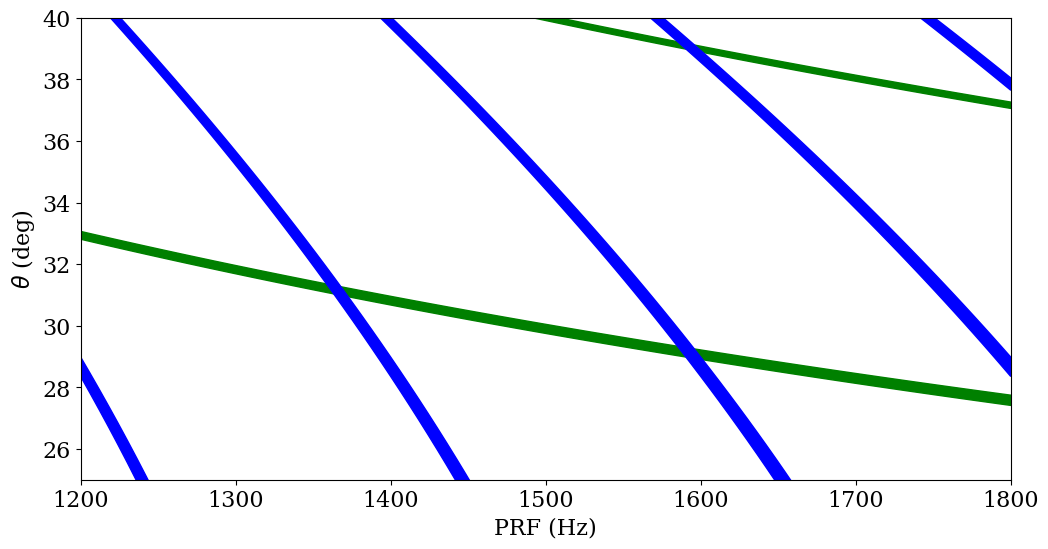

In [47]:
PRF_vals_exo2 = np.linspace(1200, 1800, 100)
plt.figure(figsize=(12,6))
plt.xlim([1200,1800])
plt.ylim([25,40])
plt.xlabel('PRF (Hz)')
plt.ylabel(r'$\theta$ (deg)')
for q in range(1,30):
    def theta_max_PRF(PRF):
        return np.rad2deg(np.arccos(2*H*PRF/(c*(q+tau*PRF))))

    def theta_min_PRF(PRF):
        return np.rad2deg(np.arccos(2*H*PRF/((q-tau*PRF)*c)))

    def theta_max_nadir(PRF):
        return np.rad2deg(np.arccos((2*H*PRF)/(c*q + 2*H*PRF + tau*c*PRF)))

    def theta_min_nadir(PRF):
        return np.rad2deg(np.arccos((2*H*PRF)/(c*q + 2*H*PRF)))

    plt.fill_between(PRF_vals_exo2, theta_min_PRF(PRF_vals_exo2), theta_max_PRF(PRF_vals_exo2), color='blue')
    plt.fill_between(PRF_vals_exo2, theta_min_nadir(PRF_vals_exo2), theta_max_nadir(PRF_vals_exo2), color='green')



<span style="color:blue">Question 5 : </span> Le designer de l'instrument choisit finalement de fixer $PRF = 1425$ Hz. Quelles sont les valeurs minimales et maximales de $\theta$ qui définissent la fauchée autorisée, sachant que l'on souhaite couvir la région autour de $\theta=35°$ ? (dans l'idéal, vous fournirez des valeurs précises à l'aide des fonctions que vous aurez écrites à la question précédente plutôt que des valeurs approximatives tirées d'une simple lecture à l'oeil du plot produit). 

Produire une nouvelle version du diagramme en diamant en y rajoutant une ligne verticale indiquant la PRF choisie et deux lignes horizontales correspondant aux bornes sur $\theta$.

En supposant une antenne idéale (gain nul en dehors du cône d'ouverture déterminé par la longueur d'onde et la taille de l'antenne) fonctionnant en bande X ($\lambda=3$ cm), calculer l'angle idéal de pointage et la largeur d'antenne idéale permettant de maximiser la fauchée.

<span style="color:blue">Question BONUS [Plus difficile et à ne faire qu'après les 2h...] : </span> Refaire cet exercice en supposant la Terre sphérique de rayon $R_T = 6400 $ km

## <span style="color:red"> Exercice 3</span>

Dans cet exercice, vous devez implémenter le traitement SAR que nous avons dérit en cours. Le fichier 'image_BE1_raw.npy' contient (au format numpy; je vous fournis la fonction permettant de lire les données) contient une image SAR avant processing.

Description des paramètres du radar dont vous avez besoin :
 * vitesse satellite $v=7400$ m/s 
 * altitude $H=900$ km
 * $PRF = 2080$ Hz
 * fréquence d'échantillonnage de l'écho retour $f_s = 200 MHz$
 * fréquence centrale du chirp $f_c=35.75$ GHz
 * bande du chirp $B_{\rm chirp}=200$ MHz
 * durée chirp $\tau = 5.7 \mu s$
 
 
Comme dans les autres exercices et dans le cours, on néglige pour simplifier la rotondité de la Terre et la courbure de l'orbite : on considère donc l'approximation Terre plate et orbite rectiligne (comme dans le cours). On considèrera également l'antenne comme idéale (cf ci-dessus).

Voici d'abord quelques lignes de code définissant une fonction d'importation des données et une fonction de visualisation que vous réutiliserez à plusieurs reprises et qui affiche simplement l'image d'amplitude en échelle de gris. Vous n'avez rien à modifier dans la cellule suivante.

In [52]:
v = 7400
H = 900e3

f_c = 35.75e9
B_chirp = 200e6 #Hz
tau = 5.7e-6
f_s = 200e6
PRF = 2080
c = 3e8 #m.s-1

In [49]:
def import_SAR_image():
    slc = np.load('image_SWOT_BE1_raw.npy')
    print('N_a = nb de lignes = nb de pulses : {}'.format(slc.shape[0]))
    print('N_r = nb de colonnes = nb de portes range : {}'.format(slc.shape[1]))
    return slc

def import_SAR_image_txtversion():
    slc = np.loadtxt('image_SWOT_BE1_re.txt')+1.j*np.loadtxt('image_SWOT_BE1_im.txt')
    print('N_a = nb de lignes = nb de pulses : {}'.format(slc.shape[0]))
    print('N_r = nb de colonnes = nb de portes range : {}'.format(slc.shape[1]))
    return slc

def import_SAR_image_xarrayversion():
    slc_ds = xr.open_dataset('image_SWOT_BE1.nc')
    slc = slc_ds.slc_re.values + 1.j * slc_ds.slc_im.values
    print('N_a = nb de lignes = nb de pulses : {}'.format(slc.shape[0]))
    print('N_r = nb de colonnes = nb de portes range : {}'.format(slc.shape[1]))
    return slc

# pour une visu plus rapide, utiliser ds_fact = 2 ou 4 si nécessaire
def plot_image_power(tab, ds_fact=1, auto_adjust_colorbar=True, in_dB=True):
    vals = np.abs(tab[::ds_fact,::ds_fact])**2
    if in_dB:
        vals = 10*np.log10(vals)
    (vmin, vmax) = (None, None)
    if auto_adjust_colorbar:
        vmax = np.percentile(vals, 95)
        vmin = np.percentile(vals, 25)
    plt.figure(figsize=(16,16))
    plt.imshow(vals, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
    plt.colorbar(shrink=.5, label={True:'dB', False:'linear'}[in_dB])
    plt.show()

Commençons par effectivement importer les données et stocker l'image dans un tableau numpy complexe. Puis visualisons le contenu de l'image (ou plus exactement son module). Comme d'habitude, le résultat avant traitement n'est pas terrible... Félicitations si vous arrivez à reconnaître la scène à ce stade.

N_a = nb de lignes = nb de pulses : 8192
N_r = nb de colonnes = nb de portes range : 4096


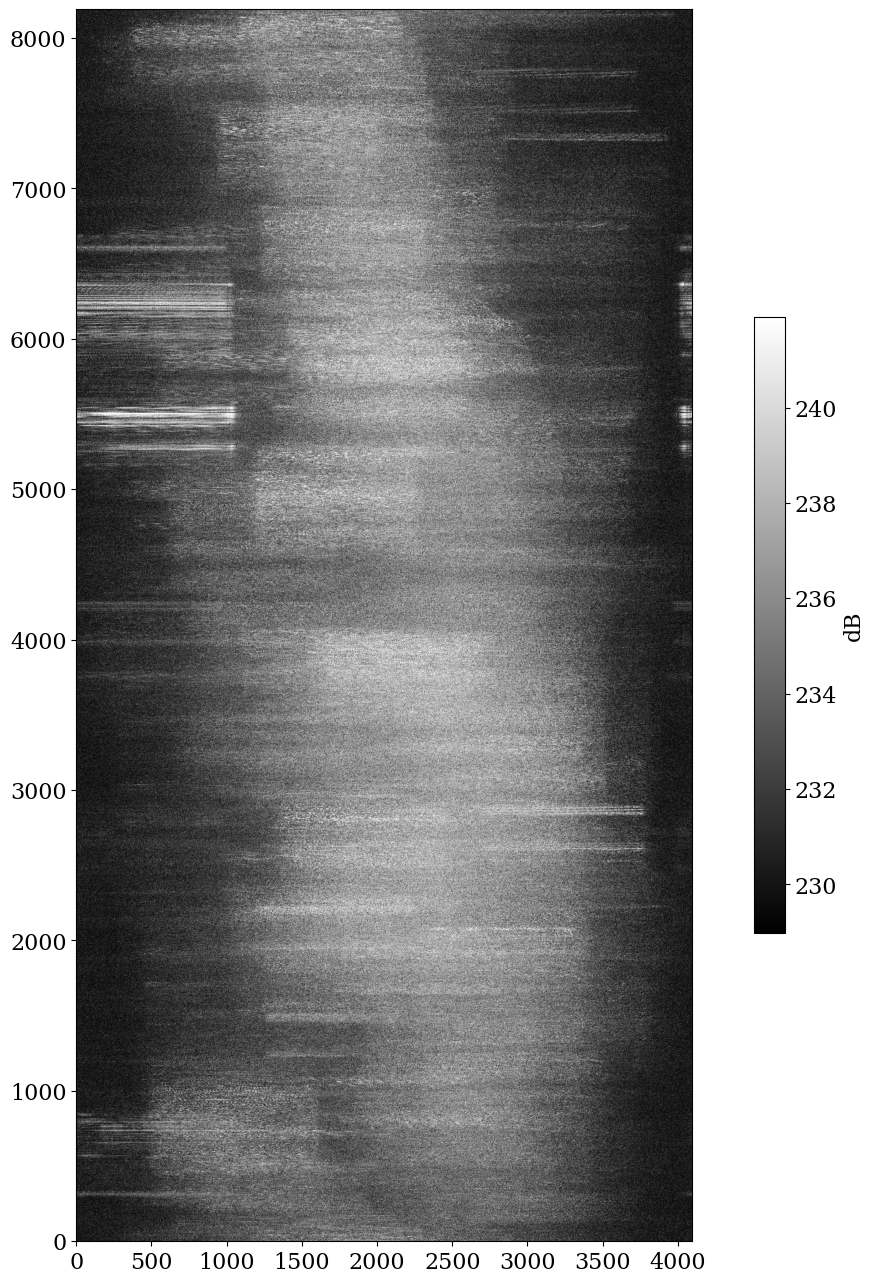

In [50]:
image_raw = import_SAR_image()
N_a, N_r = image_raw.shape

plot_image_power(image_raw)

<span style="color:blue">Question 1 : </span>L'instrument a été conçu de façon à ce que la bande Doppler $B_{\rm dop}$ soit égale à la $PRF$. En déduire la longueur $L$ de l'antenne.

In [54]:
L = 0.5*B_dop/v
L

0.2

<span style="color:blue">Question 2 : </span>Le premier échantillon de chaque écho retour (correspondant donc au premier pixel de chaque ligne) est enregistré un temps $t_0=6.0045 ms$ après l'émission de chaque pulse correspondant. En déduire le range $R_0$ en début de fauchée ainsi que la distance au sol $\rho_0$ entre le début de la fauchée et la trace du satellite.

In [60]:
t_0 = 6.0045e-3
R_0 = 2*c*t_0
print(R_0)
rho_0 = np.sqrt(-H**2 + R_0**2)
print(rho_0)
theta = np.arccos(H/R_0)
print(np.rad2deg(theta))


3602700.0
3488473.48993797
75.53357450195622


<span style="color:blue">Question 3 : </span> Vous allez à présent écrire trois fonctions séparées correspondant aux trois étapes du traitement
* compression en range
* migrations de range
* compression en azimuth

Voici quelques fonctions qui pourront vous aider dans votre implémentation (n'hésitez pas à consulter leur documentation):
* np.fft.fft2(tab) : fonction de FFT 2D. On peut également ne faire la transformée que dans une seule des deux directions. Par exemple : np.fft.fft(image_raw, axis=0) fait la fft de l'image en azimuth. Utiliser axis=1 pour une fft dans la direction range. Pour obtenir les transformées inverses, simplement rajouter un i devant le nom de la fonction, par exemple np.fft.ifft2 fait la transformée de Fourier inverse dans les deux directions de l'image
* np.fft.fftfreq(N,d=dt) : fonction qui donne la grille de fréquences de la FFT pour une série temporelle de longueur N échantillonnée au pas de temps dt. Exemple : np.fft.fftfreq(N_a, d=1/PRF) donne la grille de fréquences de la FFT dans la direction azimuth (i.e. les fréquences Doppler)
* np.tile : permet de construire un tableau 2D en répliquant un tableau 1D. Ex : np.tile(tab_1D, (N,1)) donne un tableau 2D de N lignes, chacune étant égale à tab_1D. Il suffit d'utiliser la transposition pour avoir un tableau dont toutes les colonnes sont identiques à tab_1D...

<span style="color:blue">Question 3a : </span> Commençons par la compression range qui correspond comme nous l'avons vu en cours à une opération de filtrage optimal. Nous avons également vu en cours que le filtrage optimal, comme toute opération de convolution peut s'écrire sous une formulation temporelle ou fréquentielle. Nous allons ici opter pour la seconde [<span style="color:blue">Question bonus </span> : pourquoi est-ce plus efficace ?]. Nous allons de plus utiliser l'expression analytique approchée (issue de la SPA, stationary phase approximation) de la transformée de Fourier du filtre, que nous avons donnée en cours.


A présent, complétez la fonction range_compression ci-dessous. Puis appliquez cette fonction à l'image brute et affichez le résultat à l'aide de plot_amp

In [ ]:
def range_compression(image):
    
    return 

image_rc = range_compression(image_raw)
plot_image_power(image_rc)

<span style="color:blue">Question 3b : </span> Passons à présent à la correction des migrations en distance, que nous avons vue en détail lors du cours 3. Comme discuté à cette occasion, cette correction dépend en principe du range à chaque cible (qui varie donc dans l'image) et nous négligeons cette variation. On pourra donc utiliser la valeur $R_0$ calculée à la question 2. Complétez la fonction range_migration_correction puis appliquez la à l'image ayant subi la compression de range. Affichez le résultat. 

Note : L'impact de cette étape du traitement est normalement difficile à voir simplement en regardant une image à cette échelle, en tous cas pour la configuration instrumentale qui nous intéresse dans cet exercice. En cas de difficultés avec cette fonction, vous pouvez au moins momentanément vous en passer en retournant directement l'image d'entrée. [<span style="color:blue">Question bonus </span> : la correction des migrations devient-elle plus ou moins cruciale si le radar fonctionne en bande Ku ($f_c=13.5$ GHz) plutôt que Ka ?].

In [ ]:
def range_migration_correction(image):
    
    return

image_rc_rm = range_migration_correction(image_rc)
plot_image_power(image_rc_rm)

<span style="color:blue">Question 3c : </span> Dernière étape, la compression azimuth. En utilisant la même approche que pour la question 3a, complétez la fonction ci-dessous puis affichez le résultat.

In [ ]:
def azimuth_compression(image):
    
    return

image_rc_rm_ac = azimuth_compression(image_rc_rm)
plot_image_power(image_rc_rm_ac)

A ce stade, vous devriez avoir une image permettant de reconnaitre le type de scène (pour la scène spécifique, c'est plus dur... cf question 6). Si c'est le cas, bravo ! A l'issue des 2h, je donnerai à tous l'image finale afin que vous puissiez, pendant la semaine restante, développer/tester vos fonctions en sachant ce qu'elles doivent donner...

<span style="color:blue">Question 4 : </span> Le traitement complet est donc l'enchainement de ces trois étapes. Pour autant, naivement composer les 3 fonctions que vous avez écrites ci-dessus est une solution pas du tout optimale en termes de temps calcul. Expliquez pourquoi, puis écrivez une fonction full_processing qui prend l'image brute en entrée et optimise le traitement. Vérifiez que cette fonction optimisée redonne bien le bon résultat en affichant l'image et en comparant avec votre résultat précédent.

In [ ]:
def full_processing(image):
    
    return

image_processed = full_processing(image_raw)
plot_image_power(image_processed)

<span style="color:blue">Question 5 : </span> Qu'ont de spécial les dimensions 8192x4096 de l'image d'entrée ? Pourquoi ce choix à votre avis ? [Si nécessaire, essayez de retirer une ligne et une colonne à l'image brute puis refaites tourner le traitement...] Et que faire si jamais ce critère n'est pas respecté ?

<span style="color:blue">Question 6 = Question SUPER BONUS : </span> Où a été prise cette image radar ? Le but n'est pas de reconnaitre directement à partir de l'image radar (si c'est le cas, vous êtes très très forts), mais de réussir à identifier la zone à l'aide de google maps par exemple. Je vous donne quelques indices :
* le radar avait une trajectoire (approximativement) Nord -> Sud
* il regardait sur sa gauche
* Nous sommes en Europe, quelque part sur l'orbite de la phase calibration (parfois appelée orbite à 1 jour, ou fast-sampling, ou calval) de la mission SWOT. Si ça ne vous parle pas c'est normal, et vous pouvez trouver sans. Mais vous pouvez aussi aller regarder du côté de : https://www.aviso.altimetry.fr/en/missions/current-missions/swot/orbit.html pour restreindre fortement le champ des possibles.

<span style="color:red"> 3 points bonus pour le/la premier/permière qui m'enverra par mail (alejandro.bohe@cnes.fr) une capture d'écran google maps montrant la même zone et 4-5 lignes *convaincantes* justifiant qu'il s'agit bien de la bonne zone en expliquant les différences les plus flagrantes entre l'image radar et l'image optique maps . J'insiste que c'est la première réponse qui me paraitra suffisamment détaillée qui remportera les points bonus. Ce challenge s'arrête quand j'aurai ma réponse détaillée, ce qui peut bien sûr être après les 2h de BE en salle.</span>